# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

        - Which variables are significant in predicting the price of a house, and

        - How well those variables describe the price of a house.

 

# Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# 1. Importing required libraries and dataset 

In [1]:
# import required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Graph Theme
sns.set_style('dark')

# sklearn 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# set maximum display option
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [2]:
# importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
df = pd.read_csv('train_AR.csv')

In [4]:
# look for dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Exploratory Data Analysis:

### A. Understanding the Data

In [5]:
# shape of dataset

df.shape

(1460, 81)

In [6]:
# checking for variables and its types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# check for numerical variables
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### B. Missing value imputation

In [8]:
# looking for the null values present in dataset
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
(df.isnull().sum()/len(df))*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [10]:
# we are unable to see the null values in variables due to excess variables, 
# so create the dataframe with fro each variables with null values and percentage of null values.

null_val = (df.isnull().sum()/len(df))*100


null_var = pd.DataFrame( {'var_name' : df.columns,
                         'null_values' : df.isnull().sum(),
                        'Percentage_null_values': null_val})

# sorting values on the basis of null values present i dataset
null_var.sort_values(by = 'null_values', ascending = False).head(20)

,var_name,null_values,Percentage_null_values
PoolQC,PoolQC,1453,99.520548
MiscFeature,MiscFeature,1406,96.301370
Alley,Alley,1369,93.767123
Fence,Fence,1179,80.753425
FireplaceQu,FireplaceQu,690,47.260274
LotFrontage,LotFrontage,259,17.739726
GarageYrBlt,GarageYrBlt,81,5.547945
GarageCond,GarageCond,81,5.547945
GarageType,GarageType,81,5.547945
GarageFinish,GarageFinish,81,5.547945


Since it is small dataset, we cannot affford to delete the null rows. So, we will delete columns which have null values more than 20%.

In [11]:
# droping columns with null values more than 20%

for col in df.columns:
    if ((df[col].isnull().sum()/df.shape[0])*100) >= 20:
        df.drop(col, axis = 1, inplace= True)

In [12]:
# checking for the shape after removing columns
df.shape

(1460, 76)

- 81-76 = 5 columns were droped during this operation

In [13]:
# Again
null_val = ((df.isnull().sum()/len(df))*100) 

null_var = pd.DataFrame( {'var_name' : df.columns,
                         'null_values' : df.isnull().sum(),
                        'Percentage_null_values': null_val})
null_var.sort_values(by = 'null_values', ascending= False).head(20)

,var_name,null_values,Percentage_null_values
LotFrontage,LotFrontage,259,17.739726
GarageType,GarageType,81,5.547945
GarageCond,GarageCond,81,5.547945
GarageYrBlt,GarageYrBlt,81,5.547945
GarageFinish,GarageFinish,81,5.547945
GarageQual,GarageQual,81,5.547945
BsmtFinType2,BsmtFinType2,38,2.602740
BsmtExposure,BsmtExposure,38,2.602740
BsmtFinType1,BsmtFinType1,37,2.534247
BsmtCond,BsmtCond,37,2.534247


In [14]:
# Taking out the variables which have null values more than 0%

var_with_null = null_var[null_var['null_values'] > 0].index
var_with_null

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

#### Imputing the missing values for the above variables

- Imputation for `LotFrontage`

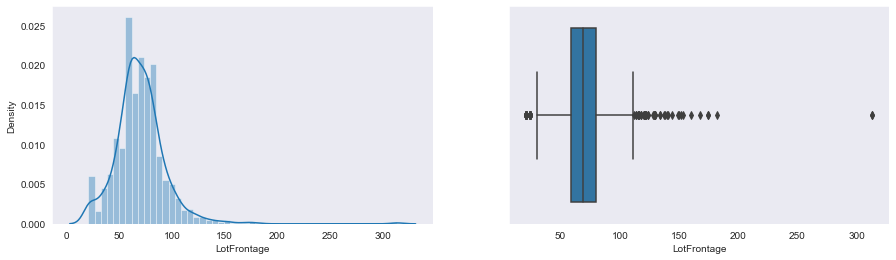

In [15]:
# plotting distribution and box plot

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df['LotFrontage'])
plt.subplot(1,2,2)
sns.boxplot(df['LotFrontage'])
plt.show()

In [16]:
# Data in the column 'LotFrontage' is right skewed hence we need to replace the missing values with the median.

# Imputation for LotFrontage
df.LotFrontage.fillna(round(df.LotFrontage.median(),0), inplace = True)

- Imputation for `GarageType`

In [17]:
# values in GarageType
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [18]:
# Imputation for GarageType, since it is categorical column imput with the mode
df.GarageType.fillna(df.GarageType.mode()[0], inplace = True)

- Imputation for `GarageYrBlt`

In [19]:
df.GarageYrBlt.value_counts()
# most of the dataset is centered around 2005 and which is also the most repeated value

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

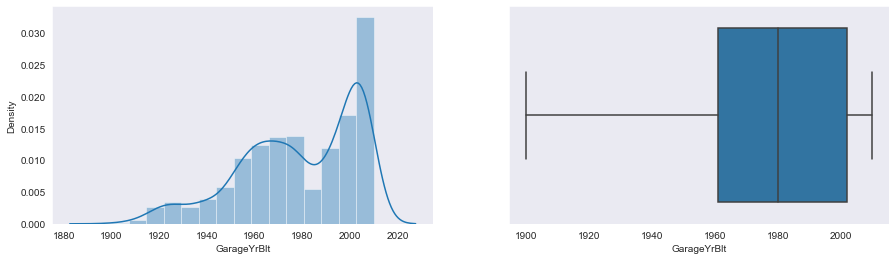

In [20]:
# plotting distribution and box plot

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df['GarageYrBlt'])
plt.subplot(1,2,2)
sns.boxplot(df['GarageYrBlt'])
plt.show()

In [21]:
# GarageYrBlt column is left skewed hence imputing missing value with median

# Imputation for GarageYrBlt
df.GarageYrBlt.fillna(df.GarageYrBlt.median(), inplace = True)

- Imputation for `GarageFinish`

In [22]:
# checking the most repeated value
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [23]:
# Imputation for GarageFinish
df.GarageFinish.fillna(df.GarageFinish.mode()[0], inplace = True)

- Imputation for `GarageQual`

In [24]:
# checking the most repeated value
df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [25]:
# Imputation for GarageQual
df.GarageQual.fillna(df.GarageQual.mode()[0], inplace = True)

- Imputation for `GarageCond`

In [26]:
# checking the most repeated value
df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [27]:
# Imputation for GarageCond
df.GarageCond.fillna(df.GarageCond.mode()[0], inplace = True)

- Imputation for `BsmtFinType2`

In [28]:
# checking the most repeated value
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [29]:
# Imputation for BsmtFinType2
df.BsmtFinType2.fillna(df.BsmtFinType2.mode()[0], inplace = True)

- Imputation for `BsmtExposure`

In [30]:
# checking the most repeated value
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [31]:
# Imputation for BsmtExposure
df.BsmtExposure.fillna(df.BsmtExposure.mode()[0], inplace = True)

- Imputation for `BsmtCond`

In [32]:
# checking the most repeated value
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [33]:
# Imputation for BsmtExposure
df.BsmtCond.fillna(df.BsmtCond.mode()[0], inplace = True)

- Imputation for `BsmtQual`

In [34]:
# checking the most repeated value
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [35]:
# Imputation for BsmtExposure
df.BsmtQual.fillna(df.BsmtQual.mode()[0], inplace = True)

- Imputation for `BsmtFinType1`

In [36]:
# checking the most repeated value
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [37]:
# Imputation for BsmtExposure
df.BsmtFinType1.fillna(df.BsmtFinType1.mode()[0], inplace = True)

- Imputation for `MasVnrType`

In [38]:
# checking the most repeated value
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [39]:
# Imputation for MasVnrType
df.MasVnrType.fillna(df.MasVnrType.mode()[0], inplace = True)

- Imputation for `MasVnrArea`

In [40]:
# checking the most repeated value
df.MasVnrArea.value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

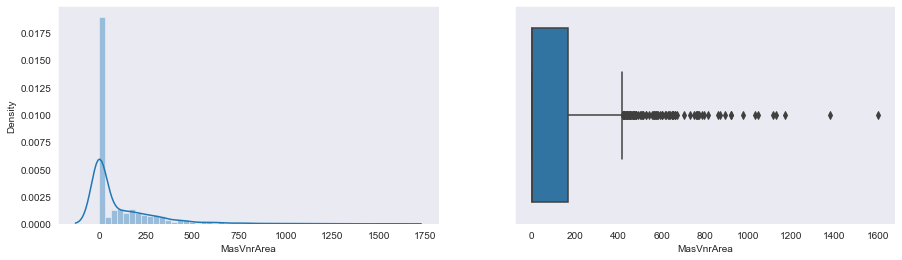

In [41]:
# plotting distribution and box plot

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df['MasVnrArea'])
plt.subplot(1,2,2)
sns.boxplot(df['MasVnrArea'])
plt.show()

In [42]:
# the data in MasVnrArea columns is right skewed, hence replace it with the median 

# Imputation for MasVnrArea
df.MasVnrArea.fillna(df.MasVnrArea.median(), inplace = True)

- Imputation for `Electrical`

In [43]:
# checking the most repeated value
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [44]:
# Imputation for Electrical
df.Electrical.fillna(df.Electrical.mode()[0], inplace = True)

In [45]:
# Again

null_val = ((df.isnull().sum()/len(df))*100) 

null_var = pd.DataFrame( {'var_name' : df.columns,
                         'null_values' : df.isnull().sum(),
                        'Percentage_null_values': null_val})
null_var.sort_values(by = 'null_values', ascending= False).head(20)

,var_name,null_values,Percentage_null_values
Id,Id,0,0.0
FullBath,FullBath,0,0.0
Fireplaces,Fireplaces,0,0.0
Functional,Functional,0,0.0
TotRmsAbvGrd,TotRmsAbvGrd,0,0.0
KitchenQual,KitchenQual,0,0.0
KitchenAbvGr,KitchenAbvGr,0,0.0
BedroomAbvGr,BedroomAbvGr,0,0.0
HalfBath,HalfBath,0,0.0
BsmtHalfBath,BsmtHalfBath,0,0.0


### C. Analysing the categorical variables

In [46]:
# taking out categorical variables
cat_var = df.select_dtypes(include= 'object')
cat_var.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [47]:
# take a look at columns in cat_var
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [48]:
# checkng the values of categorical variables

for col in cat_var.columns:
    print("\n-------------",col,"-------------")
    print(df[col].value_counts())
    print()
    print(df[col].value_counts(normalize=True)*100)


------------- MSZoning -------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

------------- Street -------------
Pave    1454
Grvl       6
Name: Street, dtype: int64

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

------------- LotShape -------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

------------- LandContour -------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

------------- Utilities -------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

AllPub    99.931507
NoSeWa

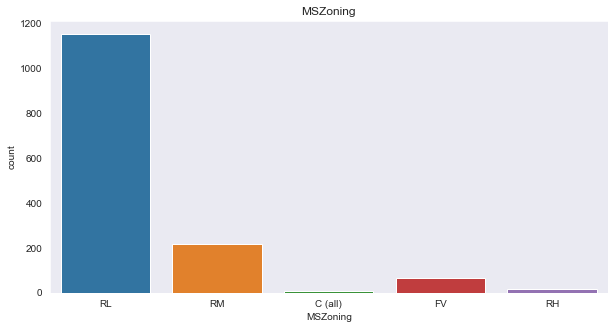

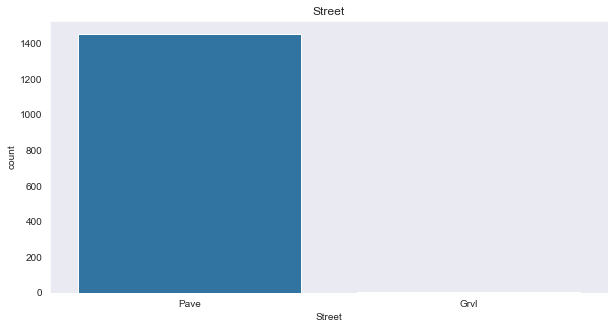

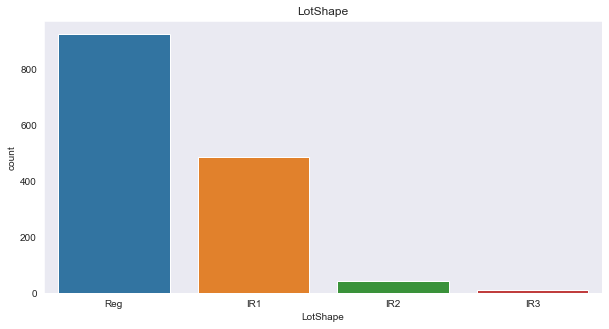

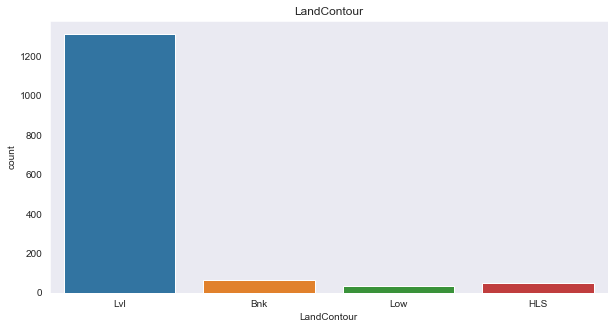

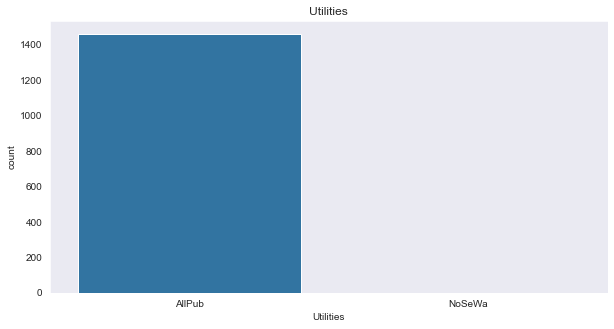

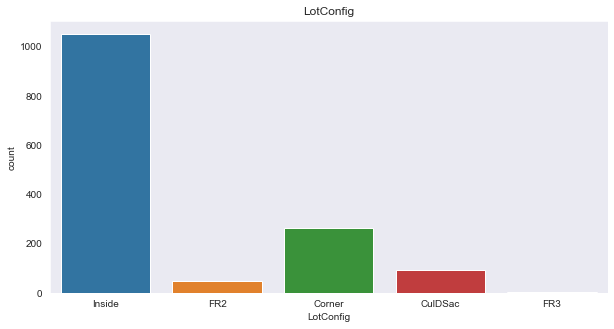

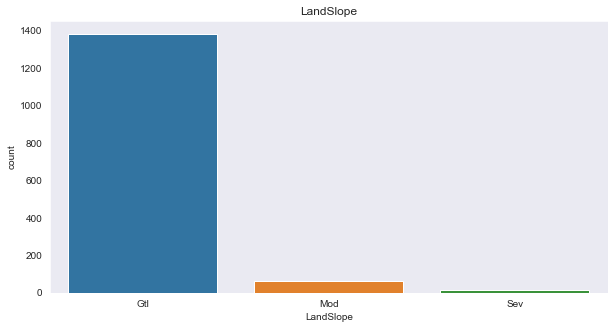

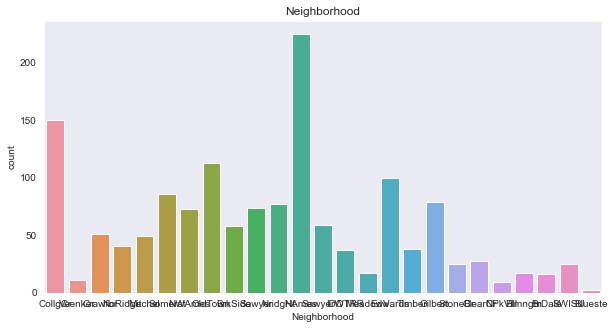

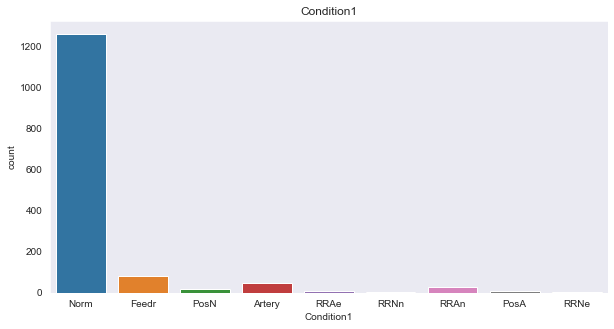

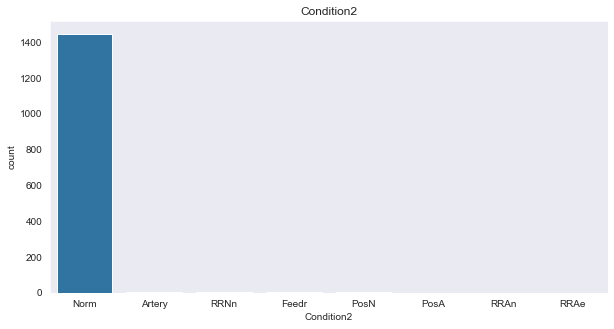

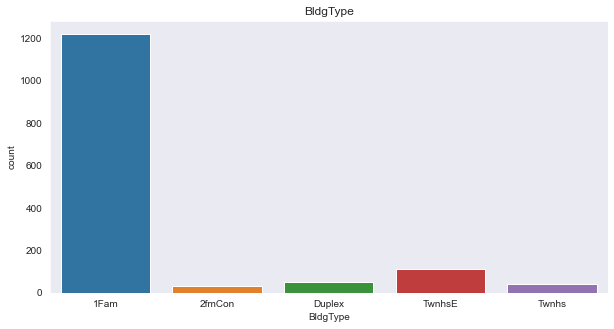

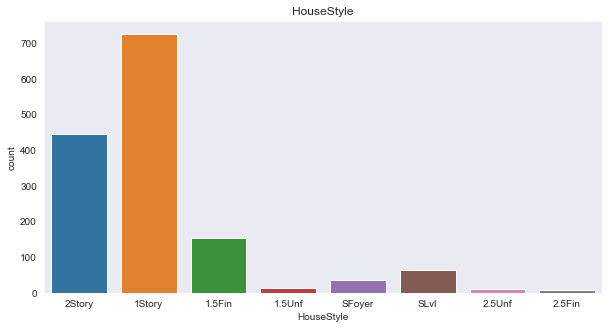

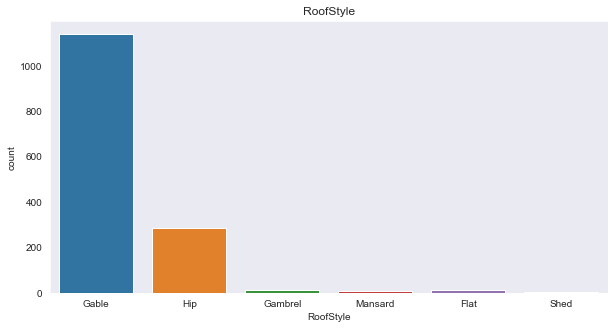

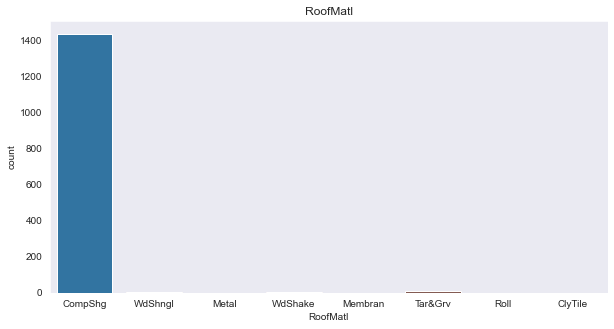

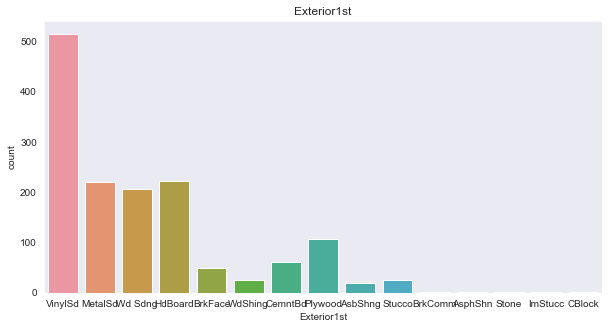

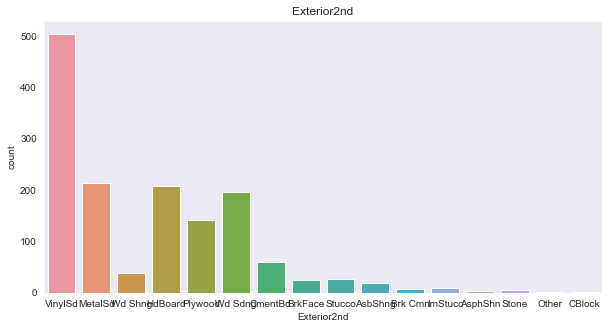

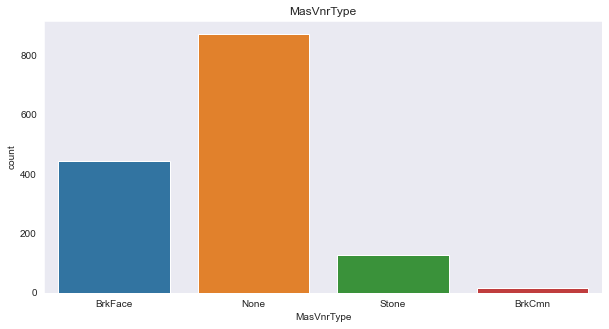

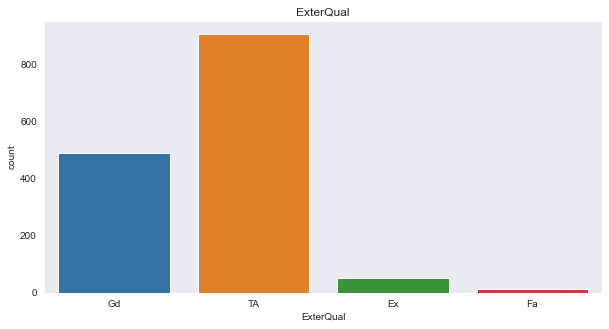

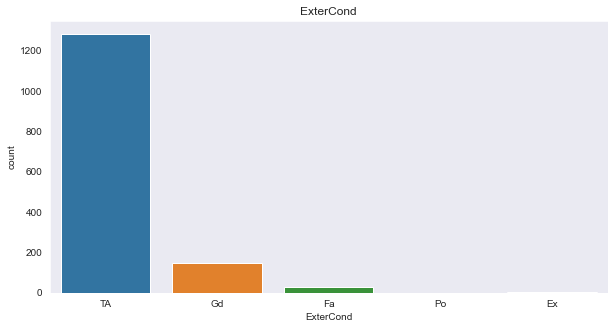

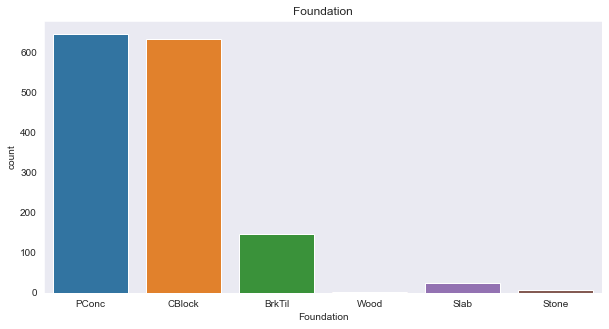

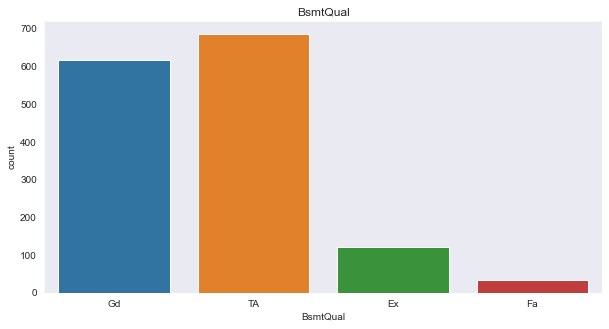

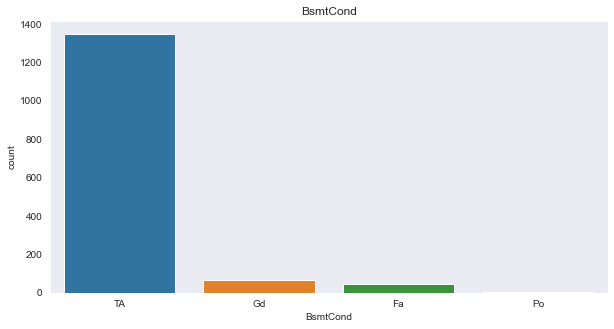

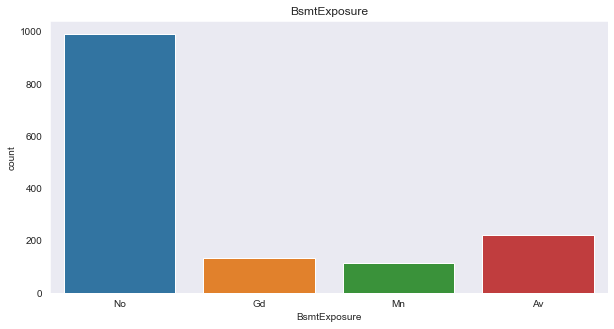

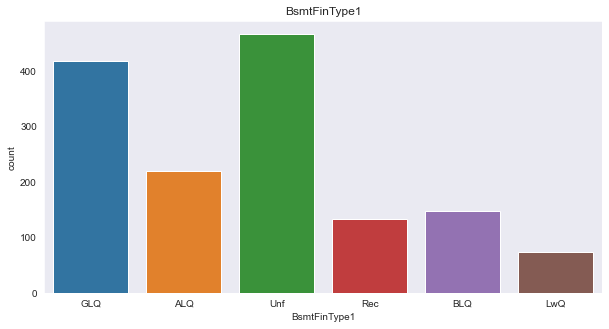

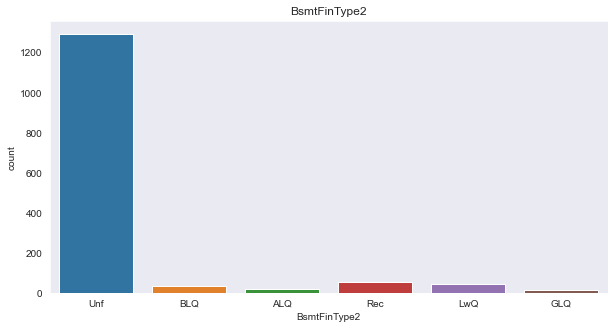

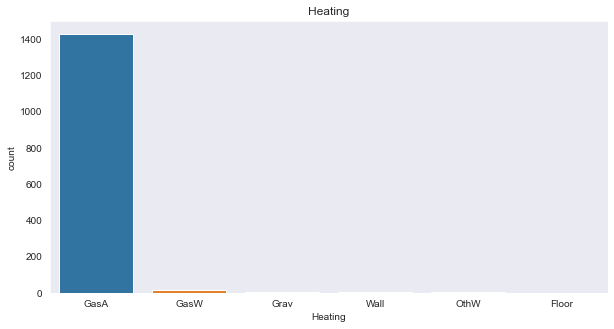

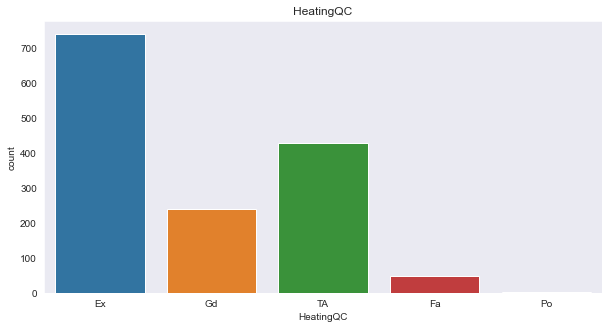

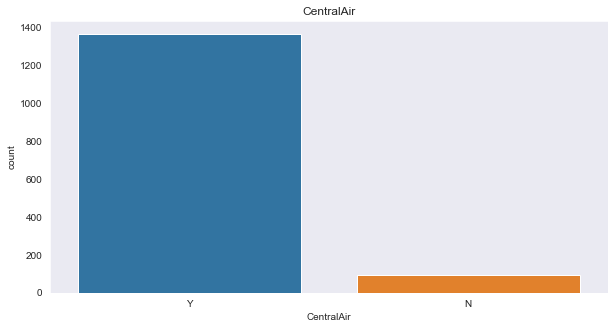

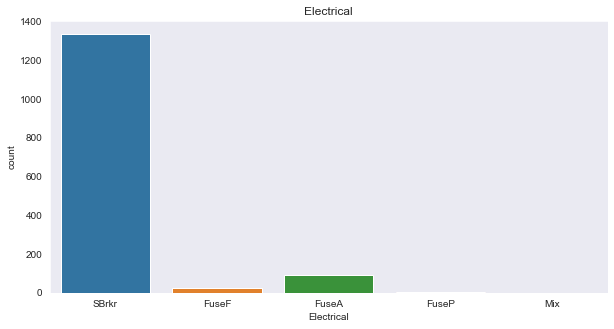

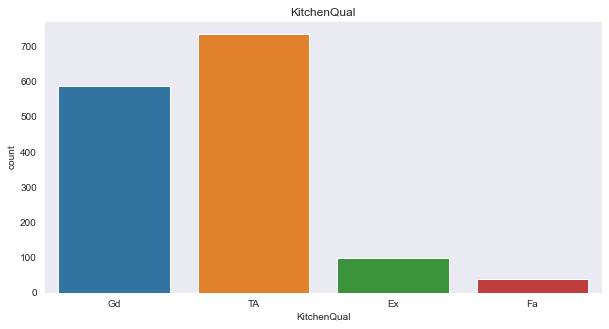

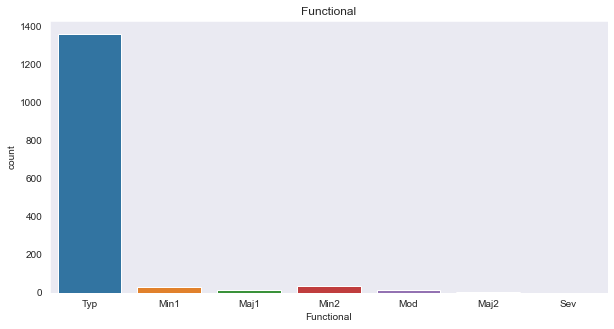

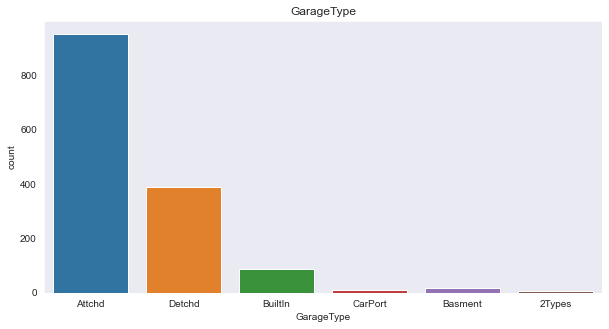

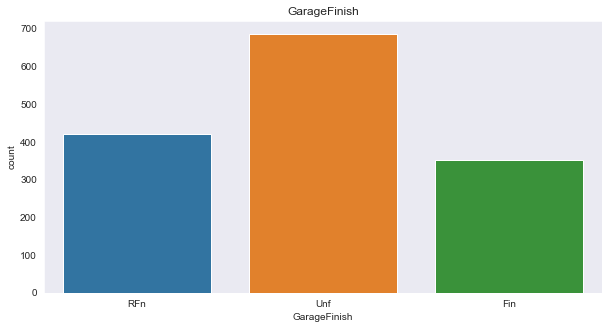

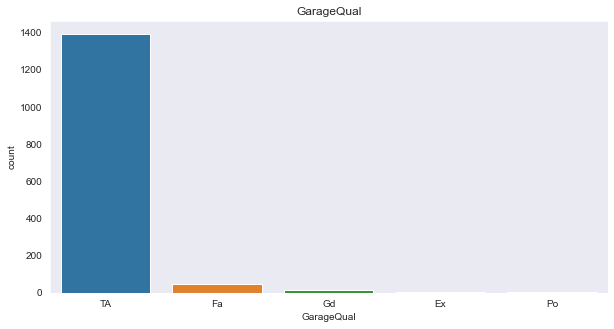

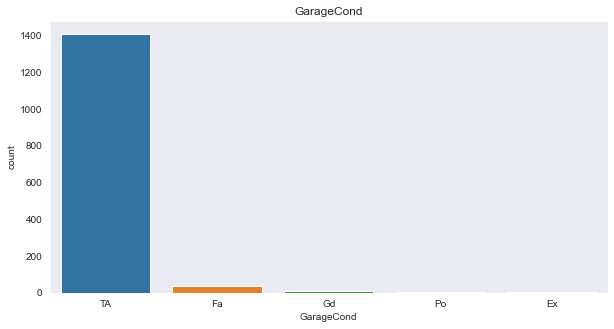

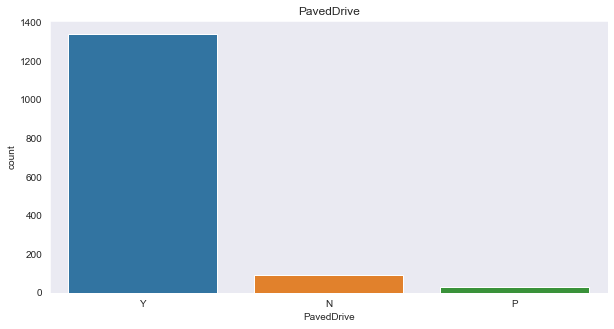

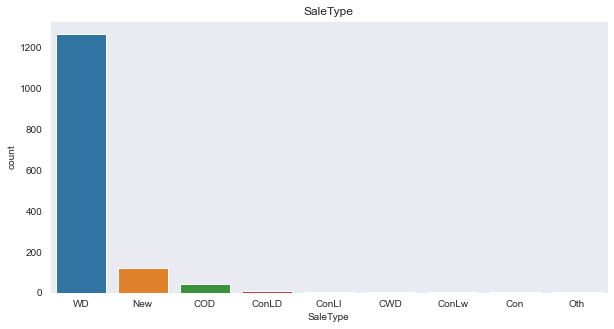

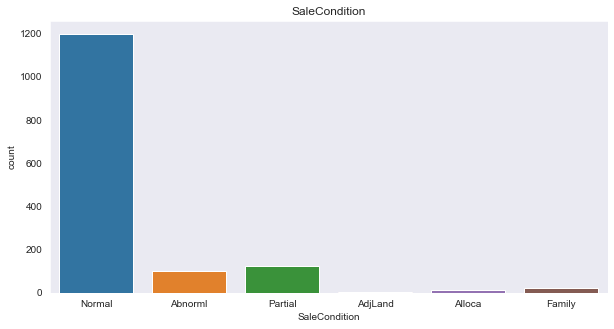

In [49]:
# count plot for better understand of distribution of values
for cat in cat_var.columns:
    plt.figure(figsize = (10,5))
    plt.title(cat)
    sns.countplot(df[cat])
plt.show()

##### Removing Categorical variables

From the above observation we can eliminate the highly imbalanced elements or variables which is having only one 
or two values in it, they are:
   - Street : Most of the roads are Paved roads
   - Utilities : Almost all the values in this variables are AllPublic
   - Condition2 : Almost al the plots are in normal condition
   - RoofMatl : Most of the appartment have Standard (Composite) Shingle
   - GarageCond : Almost all the house have the Garages and they are in average condition
   - GarageQual : Almost all the house have the Garages and they are in average condition.
   - LandSlope :  Most of the houses are on the gentle and moderate slope    
   - Heating: It is observed that most of the appartment uses the Gas as heating.

### D. Analysing the Numeric variables

In [50]:
# Changing to numeri variables
df['LotFrontage'] = df['LotFrontage'].astype(int)
df['MasVnrArea'] = df['MasVnrArea'].astype(int)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [51]:
# taking out numerical values
num_var = df.select_dtypes(include= ['int64', 'int32'])
num_var.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65,8450,7,5,2003,2003,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80,9600,6,8,1976,1976,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68,11250,7,5,2001,2002,162,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60,9550,7,5,1915,1970,0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84,14260,8,5,2000,2000,350,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000


In [52]:
num_var.shape

(1460, 38)

In [53]:
# tak a look at num_var 
num_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotFrontage    1460 non-null   int32
 3   LotArea        1460 non-null   int64
 4   OverallQual    1460 non-null   int64
 5   OverallCond    1460 non-null   int64
 6   YearBuilt      1460 non-null   int64
 7   YearRemodAdd   1460 non-null   int64
 8   MasVnrArea     1460 non-null   int32
 9   BsmtFinSF1     1460 non-null   int64
 10  BsmtFinSF2     1460 non-null   int64
 11  BsmtUnfSF      1460 non-null   int64
 12  TotalBsmtSF    1460 non-null   int64
 13  1stFlrSF       1460 non-null   int64
 14  2ndFlrSF       1460 non-null   int64
 15  LowQualFinSF   1460 non-null   int64
 16  GrLivArea      1460 non-null   int64
 17  BsmtFullBath   1460 non-null   int64
 18  BsmtHalfBath   1460 non-null   int64
 19  FullBa

In [54]:
# statistical distribution
num_var.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


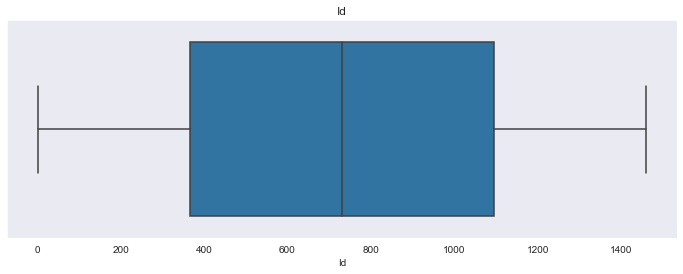

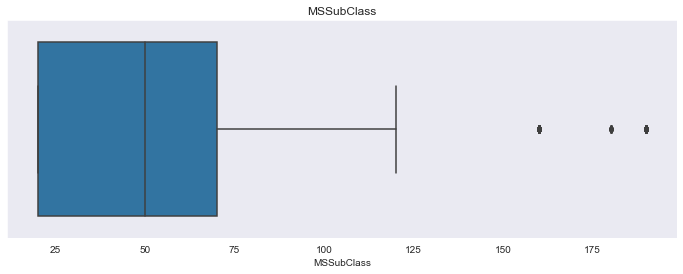

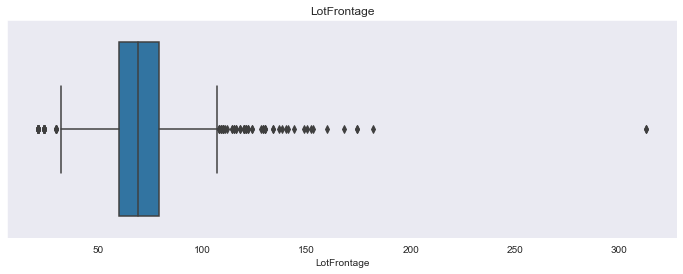

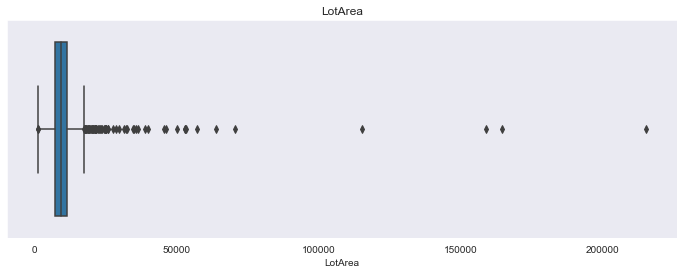

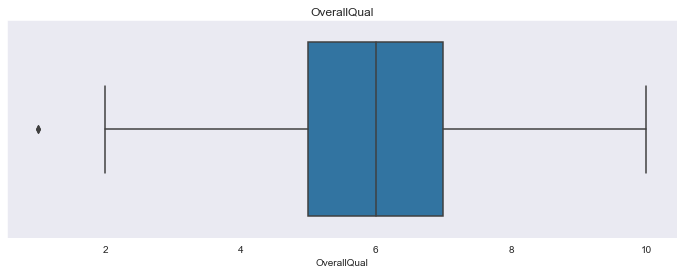

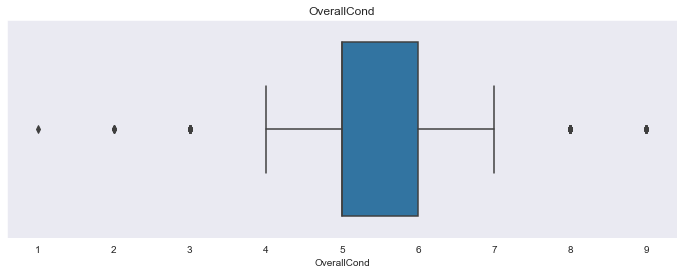

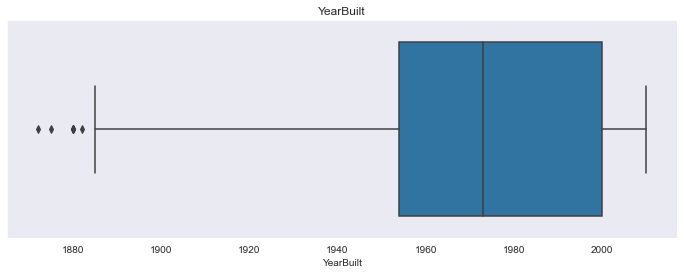

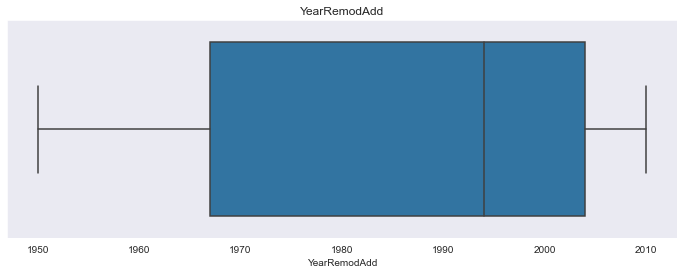

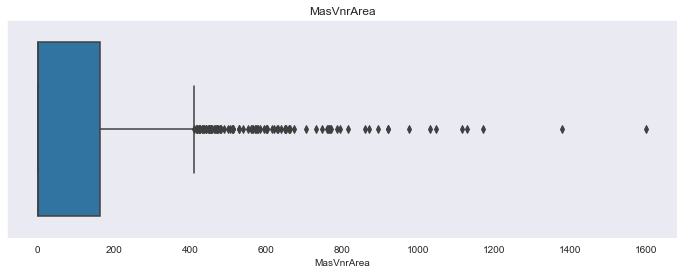

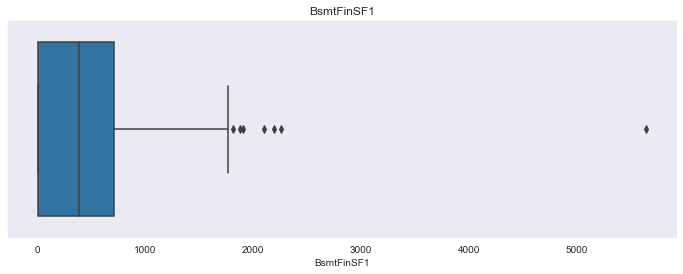

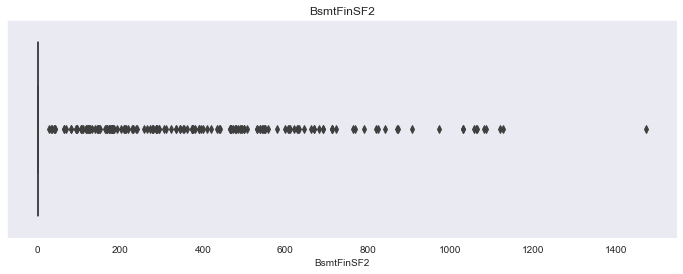

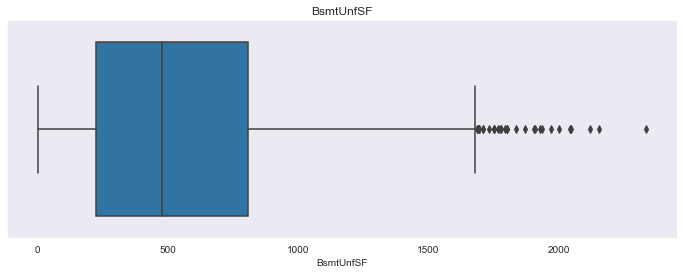

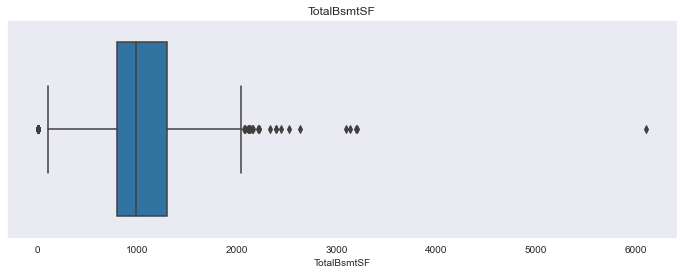

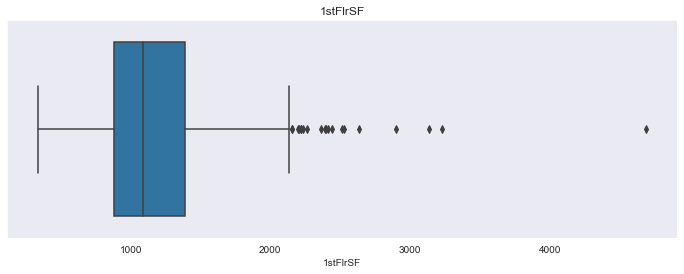

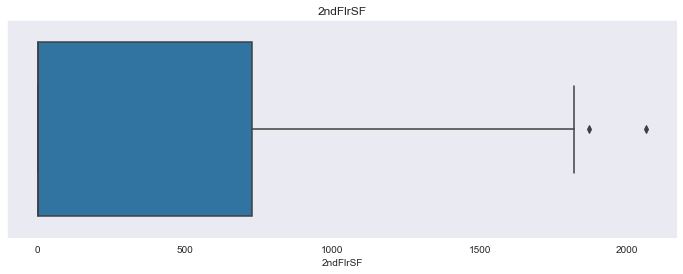

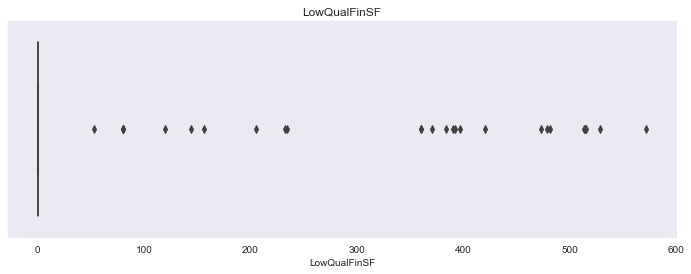

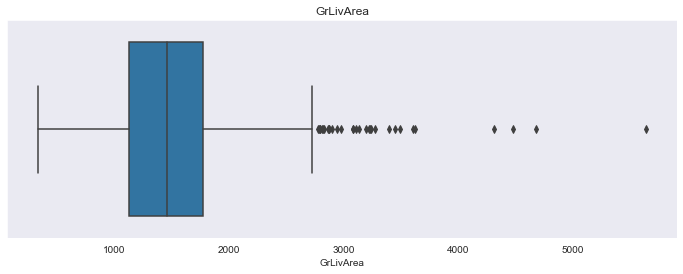

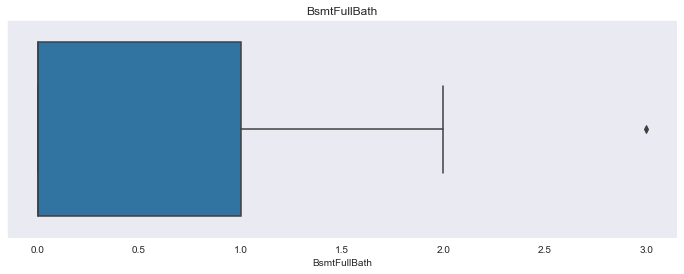

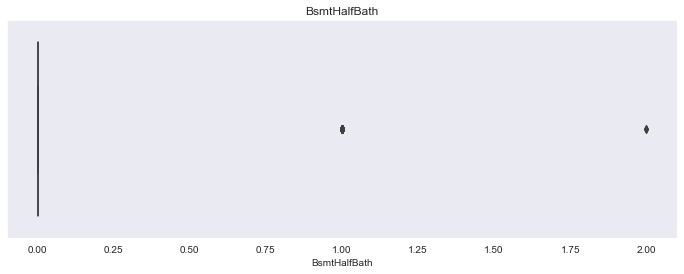

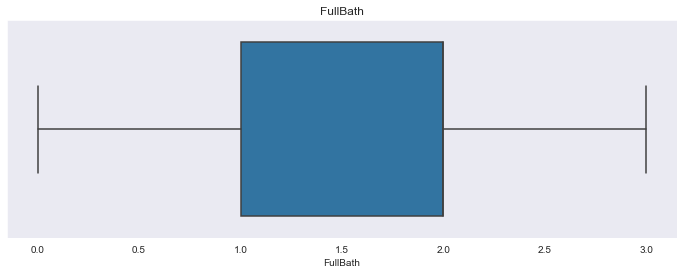

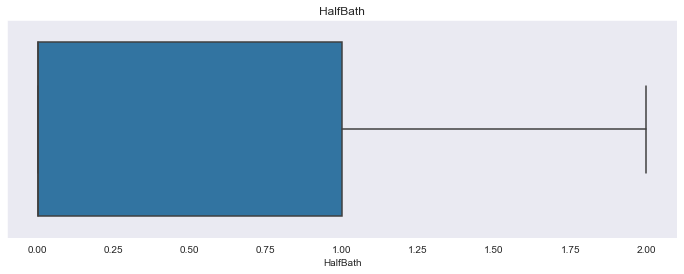

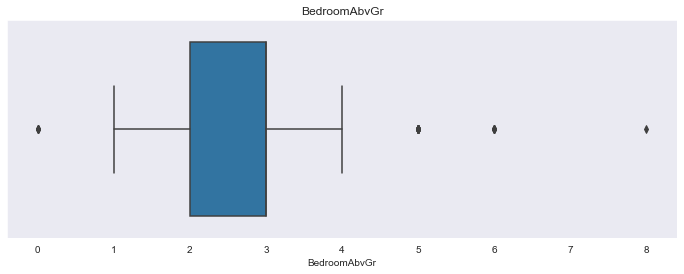

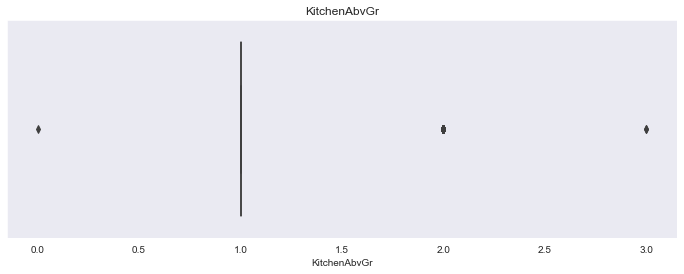

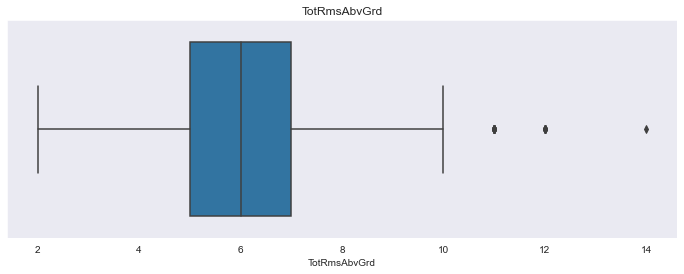

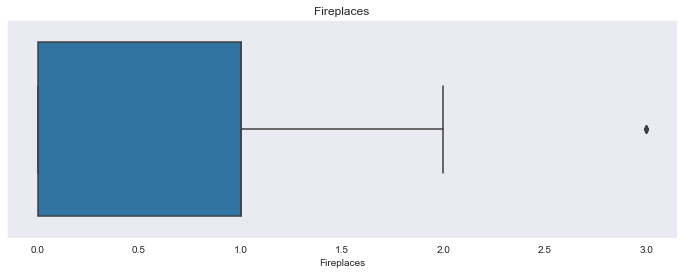

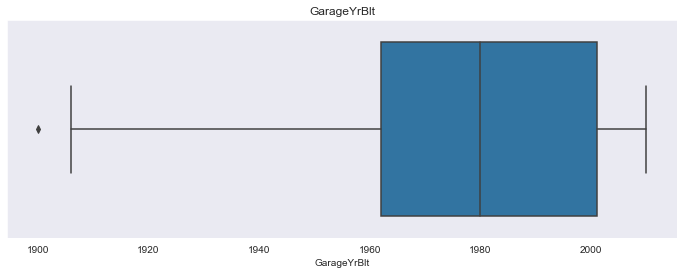

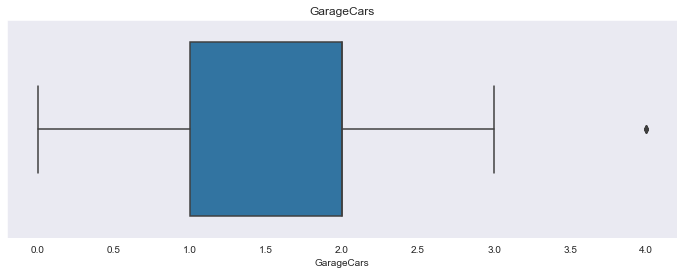

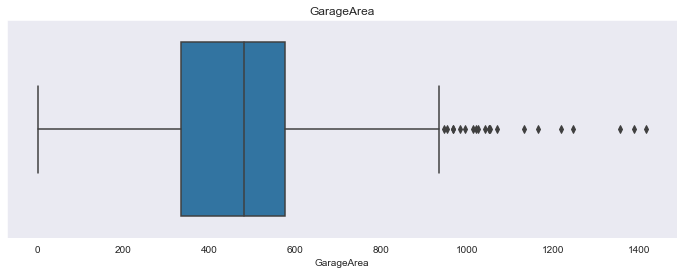

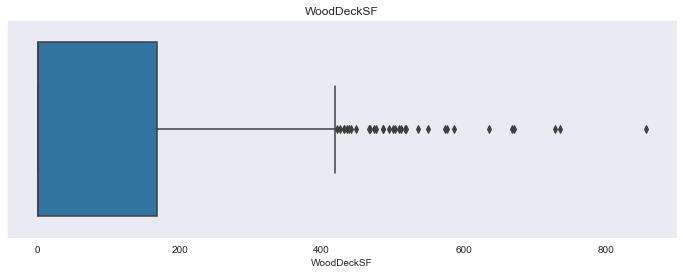

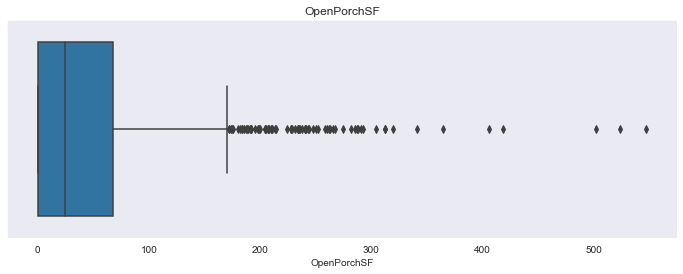

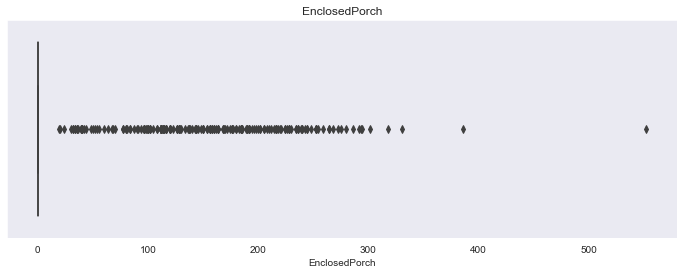

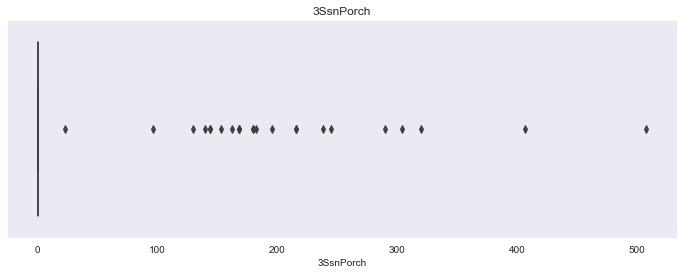

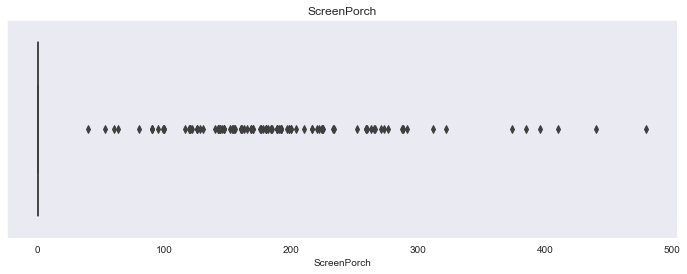

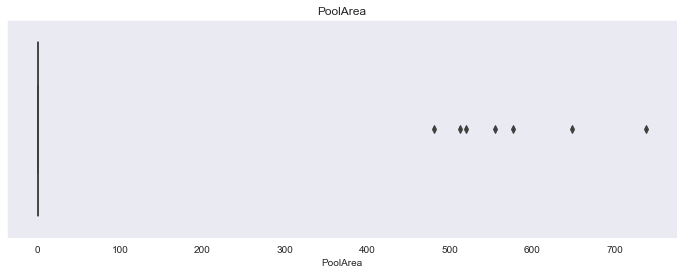

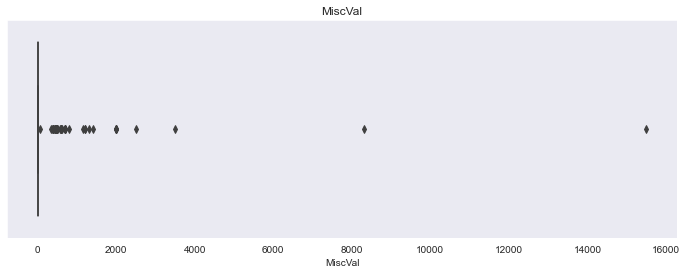

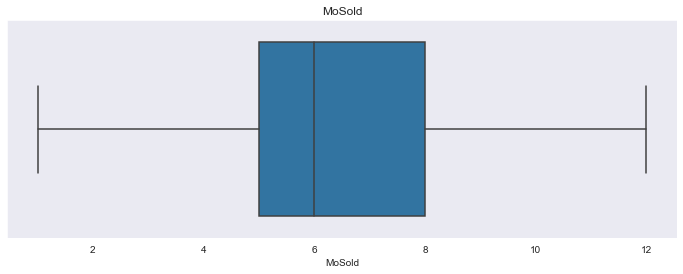

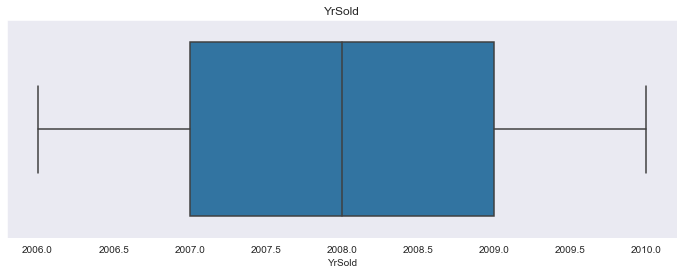

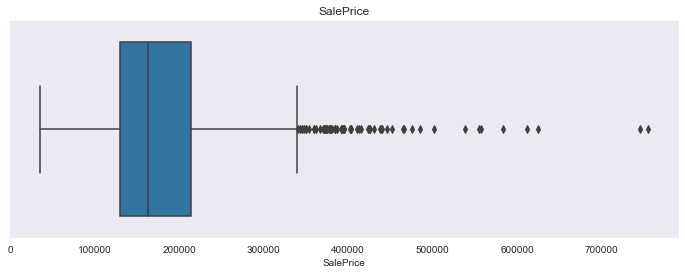

In [55]:
# variation in the numeric variable 

for numb in num_var.columns:
    plt.figure(figsize = (12,4))
    plt.title(numb)
    sns.boxplot(df[numb])
plt.show()

In [56]:
# calculating last renovation year from YearRemodAdd
df['last_renovation'] =  df['YearRemodAdd'] - df['YearBuilt']


# calculating the property age at the sold year
df['Property_Age'] =  df['YrSold'] - df['YearBuilt']

#### Removing these numeric variables

- Id: it is an id column

- In the following column most of the values are zero:
BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal

### E. Dropping the categorical and numeric variables

In [57]:
df.drop(['Id', 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'GarageCond', 'GarageQual', 'LandSlope', 'Heating', 
         'BsmtFinSF2' , 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 
         'PoolArea', 'MiscVal'], axis = 1, inplace=True)

### F. Understnding the pattern in numerical data with respect to predictor variable

In [58]:
# checking correlation between numeric variables
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,last_renovation,Property_Age
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.140759,-0.238518,-0.251758,0.307886,0.074853,0.003491,0.131608,0.177354,-0.023438,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.013585,-0.021407,-0.084284,-0.000137,-0.028746
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.124098,0.363472,0.413773,0.072388,0.368007,0.090343,0.180534,0.047222,0.236840,0.320518,0.233221,0.062996,0.269539,0.323511,0.075542,0.137014,0.010451,0.006380,0.334771,-0.073682,-0.116223
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.126031,0.014259,0.119690,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,0.001205,-0.014261,0.263843,-0.005926,-0.014832
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,0.308159,0.537808,0.476224,0.295493,0.593007,0.111098,0.550600,0.273458,0.101676,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,0.070815,-0.027347,0.790982,-0.241731,-0.572629
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,-0.136841,-0.171098,-0.144203,0.028942,-0.079686,-0.054942,-0.194149,-0.060769,0.012980,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,-0.003511,0.043950,-0.077856,0.526147,0.377325
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,0.149040,0.391452,0.281986,0.010308,0.199010,0.187599,0.468271,0.242656,-0.070651,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,0.012398,-0.013618,0.522897,-0.733896,-0.999036
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,0.181133,0.291066,0.240379,0.140024,0.287389,0.119470,0.439046,0.183331,-0.040581,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,0.021490,0.035743,0.507101,0.111922,-0.590360
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,0.113862,0.360067,0.339850,0.173800,0.388052,0.083010,0.272999,0.199108,0.102775,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.006723,-0.008317,0.472614,-0.235602,-0.311479
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.058543,0.004262,-0.107355,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.015727,0.014359,0.386420,-0.199531,-0.248483
BsmtUnfSF,-0.140759,0.124098,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,0.288886,-0.041118,0.166643,0.250647,0.051575,0.185610,0.214175,0.183303,-0.005316,0.129005,0.034888,-0.041258,0.214479,-0.031127,-0.150619


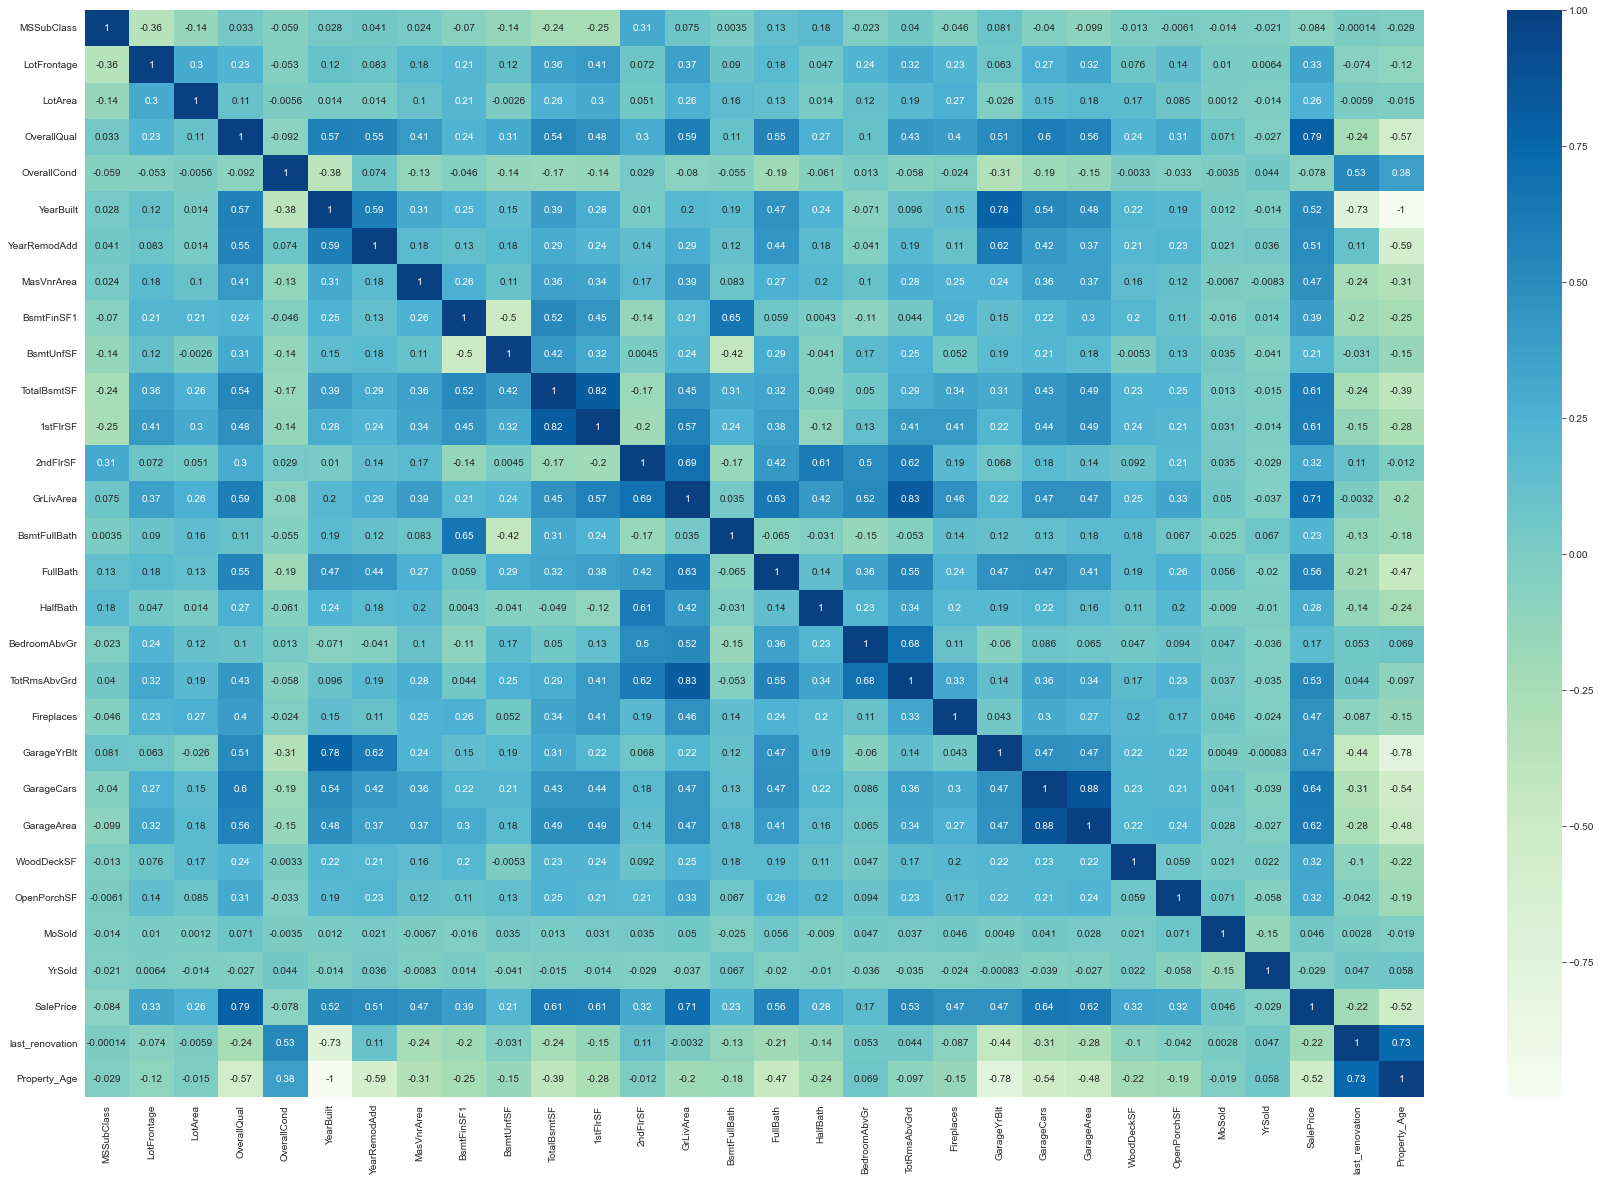

In [59]:
# plotting the heatmap for the data
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot= True, cmap="GnBu");

In [60]:
# Checking for the variables wich is highly associated with the 'SalePrice'
aa = pd.DataFrame(df.corr().iloc[-3,:])
aa.sort_values(by = 'SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [61]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,last_renovation,Property_Age
0,60,RL,65,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,1,2,1,3,Gd,8,Typ,0,Attchd,2003,RFn,2,548,Y,0,61,2,2008,WD,Normal,208500,0,5
1,20,RL,80,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,TA,6,Typ,1,Attchd,1976,RFn,2,460,Y,298,0,5,2007,WD,Normal,181500,0,31
2,60,RL,68,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,1,2,1,3,Gd,6,Typ,1,Attchd,2001,RFn,2,608,Y,0,42,9,2008,WD,Normal,223500,1,7
3,70,RL,60,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,Y,SBrkr,961,756,1717,1,1,0,3,Gd,7,Typ,1,Detchd,1998,Unf,3,642,Y,0,35,2,2006,WD,Abnorml,140000,55,91
4,60,RL,84,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,Gd,9,Typ,1,Attchd,2000,RFn,3,836,Y,192,84,12,2008,WD,Normal,250000,0,8


#### Analysising the SalePrice Variable

In [62]:
df.groupby(['YrSold']).SalePrice.mean()

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

In [63]:
df.groupby(['YrSold']).SalePrice.median()

YrSold
2006    163995.0
2007    167000.0
2008    164000.0
2009    162000.0
2010    155000.0
Name: SalePrice, dtype: float64

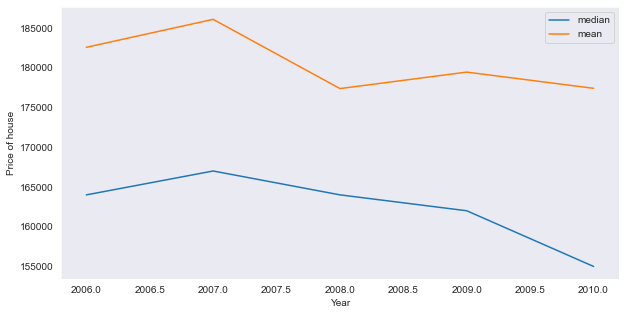

In [64]:
plt.figure(figsize=(10,5))
plt.plot(df.groupby(['YrSold']).SalePrice.median())
plt.plot(df.groupby(['YrSold']).SalePrice.mean())
plt.xlabel('Year')
plt.ylabel('Price of house')
plt.legend(["median", "mean"], loc ="upper right")
plt.show()

-  From the property sales data, it is observed that the averge price of the property is falling in this area till 2010.

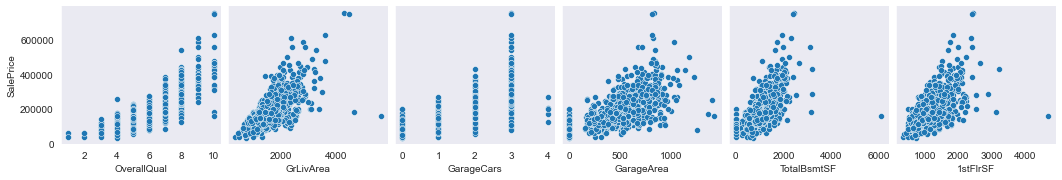

In [65]:
# plotting variables having correlation values more than 0.6
sns.pairplot(data=df, x_vars=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','1stFlrSF'], y_vars='SalePrice');

- As the overall quality of the material (OverallQual) is good, it will leads to the higher property price. 
- It is obvious that as the living area square feet increases , the property valyues also increases, and the regression valuse proves the same.
- Higher the number of GarageCars in property higher will be its property value.
- Increasing trend is observed for the GarageArea with the price of the property.
- The increase in the TotalBsmtSF area will leads to increase in price of the property.

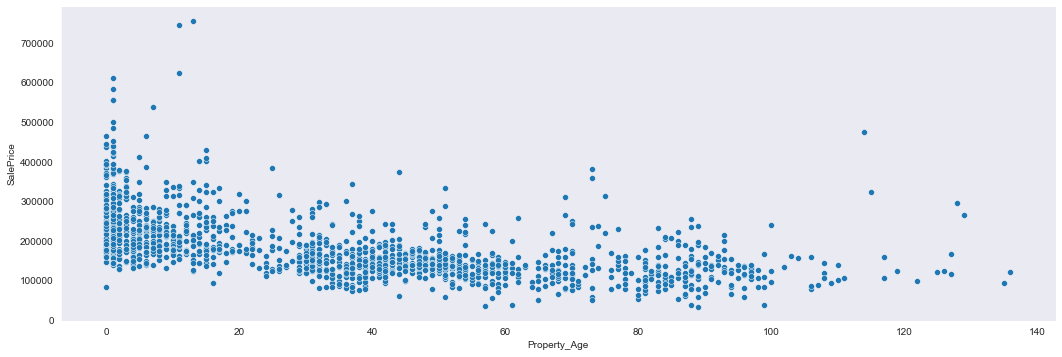

In [66]:
# plotting scatterplot for the highly negative correlated variable
sns.pairplot(data=df, x_vars= 'Property_Age', y_vars='SalePrice', aspect=3, size=5);

- The above graph shows that, as the age of the property increases the price of the property gets reduced. 
- Indicating, lesser the age of the property higher will be the property value.

### G. Standardizing the Numeric values

In [67]:
# taking numeric values
new_num_var = df.select_dtypes('int')

In [68]:
col = new_num_var.columns

In [69]:
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SalePrice', 'last_renovation', 'Property_Age'],
      dtype='object')

In [70]:
df[col]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,last_renovation,Property_Age
0,60,65,8450,7,5,2003,2003,196,706,150,856,856,854,1710,1,2,1,3,8,0,2003,2,548,0,61,2,2008,208500,0,5
1,20,80,9600,6,8,1976,1976,0,978,284,1262,1262,0,1262,0,2,0,3,6,1,1976,2,460,298,0,5,2007,181500,0,31
2,60,68,11250,7,5,2001,2002,162,486,434,920,920,866,1786,1,2,1,3,6,1,2001,2,608,0,42,9,2008,223500,1,7
3,70,60,9550,7,5,1915,1970,0,216,540,756,961,756,1717,1,1,0,3,7,1,1998,3,642,0,35,2,2006,140000,55,91
4,60,84,14260,8,5,2000,2000,350,655,490,1145,1145,1053,2198,1,2,1,4,9,1,2000,3,836,192,84,12,2008,250000,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62,7917,6,5,1999,2000,0,0,953,953,953,694,1647,0,2,1,3,7,1,1999,2,460,0,40,8,2007,175000,1,8
1456,20,85,13175,6,6,1978,1988,119,790,589,1542,2073,0,2073,1,2,0,3,7,2,1978,2,500,349,0,2,2010,210000,10,32
1457,70,66,9042,7,9,1941,2006,0,275,877,1152,1188,1152,2340,0,2,0,4,9,2,1941,1,252,0,60,5,2010,266500,65,69
1458,20,68,9717,5,6,1950,1996,0,49,0,1078,1078,0,1078,1,1,0,2,5,0,1950,1,240,366,0,4,2010,142125,46,60


In [71]:
# instantiating scaler

scaler = MinMaxScaler()

# transforming the numerical columns
df[col] = scaler.fit_transform(df[col])

In [72]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,last_renovation,Property_Age
0,0.235294,RL,0.150685,0.033420,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,0.666667,0.500,0.949275,0.883333,Gable,VinylSd,VinylSd,BrkFace,0.12250,Gd,TA,PConc,Gd,TA,No,GLQ,0.125089,Unf,0.064212,0.140098,Ex,Y,SBrkr,0.119780,0.413559,0.259231,0.333333,0.666667,0.5,0.375,Gd,0.500000,Typ,0.000000,Attchd,0.936364,RFn,0.50,0.386460,Y,0.000000,0.111517,0.090909,0.50,WD,Normal,0.241078,0.000000,0.036765
1,0.000000,RL,0.202055,0.038795,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,0.555556,0.875,0.753623,0.433333,Gable,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.173281,Unf,0.121575,0.206547,Ex,Y,SBrkr,0.212942,0.000000,0.174830,0.000000,0.666667,0.0,0.375,TA,0.333333,Typ,0.333333,Attchd,0.690909,RFn,0.50,0.324401,Y,0.347725,0.000000,0.363636,0.25,WD,Normal,0.203583,0.000000,0.227941
2,0.235294,RL,0.160959,0.046507,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,0.666667,0.500,0.934783,0.866667,Gable,VinylSd,VinylSd,BrkFace,0.10125,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.086109,Unf,0.185788,0.150573,Ex,Y,SBrkr,0.134465,0.419370,0.273549,0.333333,0.666667,0.5,0.375,Gd,0.333333,Typ,0.333333,Attchd,0.918182,RFn,0.50,0.428773,Y,0.000000,0.076782,0.727273,0.50,WD,Normal,0.261908,0.008130,0.051471
3,0.294118,RL,0.133562,0.038561,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,0.666667,0.500,0.311594,0.333333,Gable,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,0.038271,Unf,0.231164,0.123732,Gd,Y,SBrkr,0.143873,0.366102,0.260550,0.333333,0.333333,0.0,0.375,Gd,0.416667,Typ,0.333333,Detchd,0.890909,Unf,0.75,0.452750,Y,0.000000,0.063985,0.090909,0.00,WD,Abnorml,0.145952,0.447154,0.669118
4,0.235294,RL,0.215753,0.060576,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,0.777778,0.500,0.927536,0.833333,Gable,VinylSd,VinylSd,BrkFace,0.21875,Gd,TA,PConc,Gd,TA,Av,GLQ,0.116052,Unf,0.209760,0.187398,Ex,Y,SBrkr,0.186095,0.509927,0.351168,0.333333,0.666667,0.5,0.500,Gd,0.583333,Typ,0.333333,Attchd,0.909091,RFn,0.75,0.589563,Y,0.224037,0.153565,1.000000,0.50,WD,Normal,0.298709,0.000000,0.058824


### H. Creating the dummy variables for the categorical variable

In [73]:
# taking =out categorical variables
new_cat_var = df.select_dtypes(['object'])
ccol = new_cat_var.columns

In [74]:
ccol

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [75]:
ccol.shape

(30,)

In [76]:
# creating dummy variables
dummy = pd.get_dummies(df[ccol], drop_first= True)
dummy

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,

In [77]:
# concatinating orignal and dummy variable dataframes
new_df = pd.concat([df , dummy], axis = 1 )
new_df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,last_renovation,Property_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,RL,0.150685,0.033420,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,0.666667,0.500,0.949275,0.883333,Gable,VinylSd,VinylSd,BrkFace,0.122500,Gd,TA,PConc,Gd,TA,No,GLQ,0.125089,Unf,0.064212,0.140098,Ex,Y,SBrkr,0.119780,0.413559,0.259231,0.333333,0.666667,0.5,0.375,Gd,0.500000,Typ,0.000000,Attchd,0.936364,RFn,0.50,0.386460,Y,0.000000,0.111517,0.090909,0.50,WD,Normal,0.241078,0.000000,0.036765,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.000000,RL,0.202055,0.038795,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,0.555556,0.875,0.753623,0.433333,Gable,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.173281,Unf,0.121575,0.206547,Ex,Y,SBrkr,0.212942,0.000000,0.174830,0.000000,0.666667,0.0,0.375,TA,0

In [78]:
# droppung the orignal variables, to avoid the dummy variable trap
new_df.drop(new_df[ccol], axis= 1 , inplace= True)

In [79]:
new_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,last_renovation,Property_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.064212,0.140098,0.119780,0.413559,0.259231,0.333333,0.666667,0.5,0.375,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.090909,0.50,0.241078,0.000000,0.036765,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.121575,0.206547,0.212942,0.000000,0.174830,0.000000,0.666667,0.0,0.375,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.363636,0.25,0.203583,0.000000,0.227941,0,0,1,0,0,0,1,0,0,1,

In [80]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 195 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(30), uint8(165)
memory usage: 577.6 KB


### I. Splitting the datasets

In [81]:
# taking out X and y variables

X = new_df.drop(['SalePrice'], axis=1)
y = new_df['SalePrice']

In [82]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                   train_size= 0.7,
                                                   test_size= 0.3,
                                                   random_state= 100)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021, 194), (438, 194), (1021,), (438,))

# 3.Model preperation

The Dataset consist of 194 variables in it, so for the beeter model building and understanding it is necessary to reduce the number of variables. Hence, here we are using the `RFE` method.

## A. Linear Regression with RFE

In [84]:
# choosing the linear regression model 

lm = LinearRegression()

lm.fit(X_train, y_train)

# for model building choosing top 50 variables out of 194 variables
rfe = RFE(lm, n_features_to_select = 50)

rfe = rfe.fit(X_train, y_train)

In [85]:
# checking for all the variables with their selection or not
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', False, 16),
 ('BsmtUnfSF', False, 140),
 ('TotalBsmtSF', False, 130),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 2),
 ('HalfBath', False, 105),
 ('BedroomAbvGr', False, 115),
 ('TotRmsAbvGrd', False, 143),
 ('Fireplaces', False, 33),
 ('GarageYrBlt', False, 35),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 26),
 ('OpenPorchSF', False, 70),
 ('MoSold', False, 99),
 ('YrSold', True, 1),
 ('last_renovation', True, 1),
 ('Property_Age', True, 1),
 ('MSZoning_FV', False, 18),
 ('MSZoning_RH', False, 13),
 ('MSZoning_RL', False, 14),
 ('MSZoning_RM', False, 15),
 ('LotShape_IR2', False, 120),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 118),
 ('LandContou

In [86]:
# taking out the True columns 
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'GarageCars', 'GarageArea', 'YrSold',
       'last_renovation', 'Property_Age', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_AsphShn',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='

In [87]:
# Updating the value of x_train and X_test with the variables selected by rfe

X_train_rfe = X_train[col]

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021, 50), (438, 50), (1021,), (438,))

In [89]:
print('The columns used for the further anlaysis of ridge and Lasso Regression is as follows:', col)

The columns used for the further anlaysis of ridge and Lasso Regression is as follows: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'GarageCars', 'GarageArea', 'YrSold',
       'last_renovation', 'Property_Age', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_AsphShn',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev',
       'SaleType

## B. Ridge Regression

Adopting the Ridge Regression method to predict the salesprice

In [90]:
# Instantiating Lasso regression
ridge = Ridge()

In [91]:
# taking out the parameters lambda function
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,10]}

# 5 fold validation
folds = 5

In [92]:
model_cv_ri =  GridSearchCV(estimator= ridge,
                            param_grid= params,
                            scoring= 'neg_mean_absolute_error',
                            cv = folds,
                            return_train_score= True,
                            verbose= 1)

model_cv_ri.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# best alpha value
model_cv_ri.best_params_

{'alpha': 1.0}

In [94]:
# creating the datasets with result value
cv_ri = pd.DataFrame(model_cv_ri.cv_results_)
cv_ri.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006242,0.007644,0.003125,0.006250,0.0001,{'alpha': 0.0001},-0.025622,-0.027659,-0.029495,-0.025866,-0.024230,-0.026574,0.001823,15,-0.025445,-0.022306,-0.023925,-0.025172,-0.025735,-0.024517,0.001266
1,0.003126,0.006252,0.000000,0.000000,0.001,{'alpha': 0.001},-0.025620,-0.027657,-0.029494,-0.025863,-0.024228,-0.026572,0.001823,14,-0.025445,-0.022306,-0.023925,-0.025173,-0.025735,-0.024517,0.001266
2,0.000000,0.000000,0.003125,0.006249,0.01,{'alpha': 0.01},-0.025604,-0.027658,-0.029483,-0.025834,-0.024213,-0.026558,0.001828,13,-0.025443,-0.022306,-0.023917,-0.025179,-0.025738,-0.024517,0.001268
3,0.000000,0.000000,0.006251,0.007656,0.05,{'alpha': 0.05},-0.025551,-0.027671,-0.029455,-0.025730,-0.024166,-0.026514,0.001846,12,-0.025427,-0.022311,-0.023890,-0.025191,-0.025736,-0.024511,0.001267
4,0.006250,0.007655,0.003125,0.006249,0.1,{'alpha': 0.1},-0.025497,-0.027676,-0.029431,-0.025630,-0.024130,-0.026473,0.001863,11,-0.025403,-0.022321,-0.023861,-0.025197,-0.025728,-0.024502,0.001262


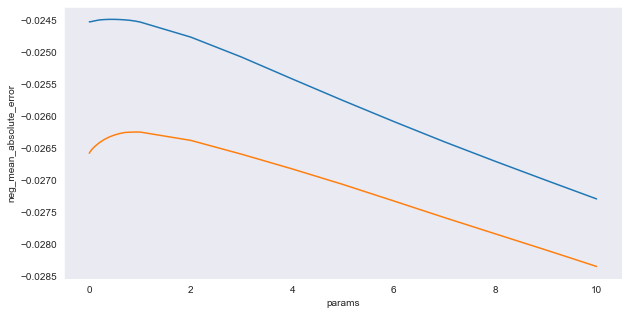

In [95]:
# plotting the parameters with the train and test scores of neg_mean_absolute_error

plt.figure(figsize=(10,5))
plt.plot(cv_ri['param_alpha'], cv_ri['mean_train_score'])
plt.plot(cv_ri['param_alpha'], cv_ri['mean_test_score'])
plt.xlabel('params')
plt.ylabel('neg_mean_absolute_error')
plt.show()

In [96]:
# predicting the results with the alpha = 1
alpha = 1.0

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge()

In [97]:
# Checking the intercept and coefficient values
print(ridge.intercept_)
print(ridge.coef_)

0.0578518525512737
[-0.05550449 -0.0225241   0.10932769  0.12655725  0.06081154  0.02308503
  0.01898372  0.0213507   0.1629873   0.07874383  0.15996482  0.0467609
  0.05549336 -0.01147577 -0.00374808 -0.01663993 -0.02353475 -0.03751757
  0.02833274  0.04185467  0.02746688  0.04678537 -0.02103001  0.08582691
  0.04507098  0.02633491  0.05072711 -0.00279779  0.00180147 -0.0330238
 -0.00279779  0.00180147  0.02704023  0.         -0.0233527  -0.02735421
  0.         -0.02452777 -0.04783496 -0.04598762 -0.05046742  0.0354033
 -0.04333725 -0.04618387 -0.05307659 -0.0494276   0.04339334  0.02969683
  0.00296377  0.00296377]


In [98]:
# predicting for train and test data
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [99]:
print("On Train Dataset")
print('r2_score on train data:', round(r2_score(y_train, y_pred_train),4))
print('mean squared error for train data:', round(mean_squared_error(y_train, y_pred_train),4))
print('rss for train data:', round(np.sum(np.square(y_train - y_pred_train))))
print('*'*50)
print("On Test Dataset")
print('r2_score on test data:', round(r2_score(y_test, y_pred_test),4))
print('mean squared error for test data:', round(mean_squared_error(y_test, y_pred_test),4))
print('rss for test data:', round(np.sum(np.square(y_test - y_pred_test))))

On Train Dataset
r2_score on train data: 0.8668
mean squared error for train data: 0.0016
rss for train data: 2
**************************************************
On Test Dataset
r2_score on test data: 0.8522
mean squared error for test data: 0.0018
rss for test data: 1


In [100]:
# creating dataframe with the coefficients
coeff = pd.DataFrame(index= X_train.columns)
coeff['ridge_coeff'] = ridge.coef_
coeff

,ridge_coeff
MSSubClass,-0.055504
LotFrontage,-0.022524
LotArea,0.109328
OverallQual,0.126557
OverallCond,0.060812
YearBuilt,0.023085
YearRemodAdd,0.018984
MasVnrArea,0.021351
1stFlrSF,0.162987
2ndFlrSF,0.078744


## C. Lasso Regression

Adopting the Lasso Regression for the prediction of the SalePrice for an appartment.

In [101]:
# Instantiating Lasso regression
lasso = Lasso()

In [102]:
# taking out the parameters lambda function
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1, 5.0, 10.0, 50, 100, 500 ]}

# 5 fold validation
folds = 5

In [103]:
# Adopting cross_validation using 5 fold  

model_cv_la = GridSearchCV(estimator= lasso,
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score= True,
                        verbose= 1)

model_cv_la.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5.0, 10.0,
                                   50, 100, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
# look for beast parameter
model_cv_la.best_params_

{'alpha': 0.0001}

In [105]:
#checking for the detailed results
cv_re = pd.DataFrame(model_cv_la.cv_results_)
cv_re.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037496,0.007653,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.025077,-0.027665,-0.029124,-0.024893,-0.023658,-0.026083,0.002003,1,-0.025171,-0.022575,-0.023577,-0.025035,-0.025831,-0.024438,0.001187
1,0.009374,0.007654,0.006250,0.007655,0.001,{'alpha': 0.001},-0.028712,-0.032772,-0.031536,-0.029090,-0.028287,-0.030079,0.001757,2,-0.029883,-0.027928,-0.028249,-0.029041,-0.029791,-0.028978,0.000790
2,0.006250,0.007655,0.000000,0.000000,0.01,{'alpha': 0.01},-0.059743,-0.065748,-0.059602,-0.058561,-0.061096,-0.060950,0.002530,3,-0.061385,-0.059279,-0.061073,-0.061057,-0.061204,-0.060800,0.000769
3,0.000000,0.000000,0.009374,0.007654,0.05,{'alpha': 0.05},-0.080163,-0.083497,-0.077215,-0.075374,-0.083570,-0.079964,0.003291,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890
4,0.006250,0.007654,0.000000,0.000000,0.1,{'alpha': 0.1},-0.080163,-0.083497,-0.077215,-0.075374,-0.083570,-0.079964,0.003291,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890


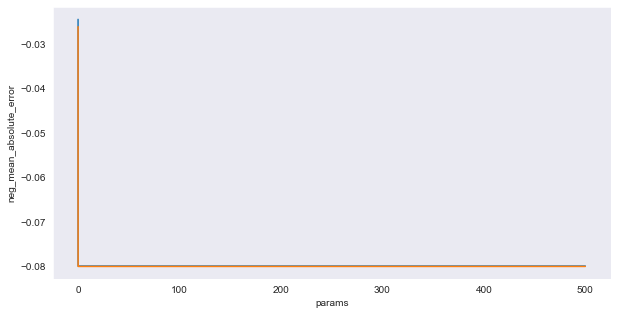

In [106]:
# plotting the parameters with the train and test scores of neg_mean_absolute_error

plt.figure(figsize=(10,5))
plt.plot(cv_re['param_alpha'], cv_re['mean_train_score'])
plt.plot(cv_re['param_alpha'], cv_re['mean_test_score'])
plt.xlabel('params')
plt.ylabel('neg_mean_absolute_error')
plt.show()

In [107]:
# fitting the lasso model with alpha = 0.0001

alpha = 0.0001

lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train) 


Lasso(alpha=0.0001)

In [108]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_la = lasso.predict(X_train)
y_pred_test_la = lasso.predict(X_test)

In [109]:
print("On Train Dataset")
print('r2_score on train data:', round(r2_score(y_train, y_pred_train_la),4))
print('mean squared error for train data:', round(mean_squared_error(y_train, y_pred_train_la),4))
print('rss for train data:', round(np.sum(np.square(y_train - y_pred_train_la))))
print('*'*50)
print("On Test Dataset")
print('r2_score on test data:', round(r2_score(y_test, y_pred_test_la),4))
print('mean squared error for test data:', round(mean_squared_error(y_test, y_pred_test_la),4))
print('rss for test data:', round(np.sum(np.square(y_test - y_pred_test_la))))

On Train Dataset
r2_score on train data: 0.8634
mean squared error for train data: 0.0016
rss for train data: 2
**************************************************
On Test Dataset
r2_score on test data: 0.8558
mean squared error for test data: 0.0018
rss for test data: 1


In [110]:
# Checking for the coefficient of variables

lasso.coef_

array([-5.01575211e-02, -5.61355960e-03,  1.02307558e-01,  1.40057616e-01,
        5.61231034e-02,  0.00000000e+00,  1.10967424e-02,  1.29530485e-02,
        1.05454920e-02,  0.00000000e+00,  3.54006739e-01,  4.47480514e-02,
        4.67568533e-02, -0.00000000e+00, -1.41309158e-03, -0.00000000e+00,
       -6.44789185e-02, -3.31099124e-02,  2.44445292e-02,  3.65534966e-02,
        2.49632700e-02,  4.40640791e-02, -1.87507153e-02,  8.43459274e-02,
        4.38962173e-02,  2.42363140e-02,  4.46268357e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.17732529e-02,  0.00000000e+00, -0.00000000e+00, -2.06118746e-03,
        0.00000000e+00,  0.00000000e+00, -4.23448576e-02, -4.37804360e-02,
       -4.70066915e-02,  3.57556673e-02, -3.81515469e-02, -4.18518774e-02,
       -4.86395031e-02, -0.00000000e+00,  1.18703692e-02,  7.54128966e-03,
        5.08742816e-03,  3.19974446e-18])

In [111]:
# adding the coefficeint obtained by lass into dataframe
coeff['lasso_coeff'] = lasso.coef_
coeff

,ridge_coeff,lasso_coeff
MSSubClass,-0.055504,-5.015752e-02
LotFrontage,-0.022524,-5.613560e-03
LotArea,0.109328,1.023076e-01
OverallQual,0.126557,1.400576e-01
OverallCond,0.060812,5.612310e-02
YearBuilt,0.023085,0.000000e+00
YearRemodAdd,0.018984,1.109674e-02
MasVnrArea,0.021351,1.295305e-02
1stFlrSF,0.162987,1.054549e-02
2ndFlrSF,0.078744,0.000000e+00


In [112]:
coeff[coeff['lasso_coeff'] != 0].sort_values(ascending=False, by='lasso_coeff' )

,ridge_coeff,lasso_coeff
GrLivArea,0.159965,3.540067e-01
OverallQual,0.126557,1.400576e-01
LotArea,0.109328,1.023076e-01
Neighborhood_NoRidge,0.085827,8.434593e-02
OverallCond,0.060812,5.612310e-02
GarageCars,0.055493,4.675685e-02
BsmtFullBath,0.046761,4.474805e-02
Neighborhood_StoneBr,0.050727,4.462684e-02
Neighborhood_Crawfor,0.046785,4.406408e-02
Neighborhood_NridgHt,0.045071,4.389622e-02


In [113]:
coeff.sort_values(ascending=False, by=['lasso_coeff'])

,ridge_coeff,lasso_coeff
GrLivArea,0.159965,3.540067e-01
OverallQual,0.126557,1.400576e-01
LotArea,0.109328,1.023076e-01
Neighborhood_NoRidge,0.085827,8.434593e-02
OverallCond,0.060812,5.612310e-02
GarageCars,0.055493,4.675685e-02
BsmtFullBath,0.046761,4.474805e-02
Neighborhood_StoneBr,0.050727,4.462684e-02
Neighborhood_Crawfor,0.046785,4.406408e-02
Neighborhood_NridgHt,0.045071,4.389622e-02


- variables choosen by lasso regression is as follows:
1stFlrSF, OverallQual, 2ndFlrSF, LotArea,Neighborhood_NoRidge, OverallCond, GarageCars, BsmtFullBath, Neighborhood_StoneBr, Neighborhood_NridgHt, Neighborhood_Crawfor, LandContour_Low, BsmtExposure_Gd, Exterior1st_BrkFace, Neighborhood_Somerst, FullBath, LandContour_Lvl, LandContour_HLS, Exterior2nd_ImStucc, YearRemodAdd, SaleType_ConLD, SaleType_New, SaleType_Con,ExterCond_Gd, YrSold,	KitchenQual_Fa, LotShape_IR3, KitchenQual_Gd, BsmtQual_Fa,BsmtQual_Gd, KitchenQual_TA, BsmtQual_TA, MSSubClass, Property_Age,

## Conclusion:

- The given housing dataset consist of 81 variables and 1460 records.
- The SalePrice is an predictor variable.
- In given Dataset variables such as: 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','1stFlrSF' are highly correlated with the SalePrice.
- New Feature such as Property_age is negatively correlated with the salesprice of property, as the age of the property increases property value decreases.
- Top 50 features were selected, on the basis of `Recursive Feature Elimination (RFE)` with the help of linear regression.

- In case of `Ridge regression`: 
    - optimum value of alpha for regression is 1.0.
    - r2_score for train and test dataset are 0.8668 and 0.8522 respectively.
    - Mean Squared error for train and test data is 0.0016 and 0.0018 respectively.

- Similarly for `Lasso Regression`:
    - optimum value of alpha for regression is 0.0001.
    - r2_score for train and test dataset are 0.8634 and 0.8558 respectively.
    - Mean Squared error for train and test data is 0.0016 and 0.0018 respectively.
    - Out of 50 variables, lasso regression eliminates 14 variables (having coeff 0).


# Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


#### Answer:

In [114]:
# optimum values of alpha for ridge and lasso regression is:
# best parameter
print(model_cv_la.best_params_)
print(model_cv_ri.best_params_)

{'alpha': 0.0001}
{'alpha': 1.0}


#### Ridge Regression:

In [115]:
# predicting the results with the alpha = 1
alpha = 2.0

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# predicting for train and test data
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [116]:
print("On Train Dataset")
print('r2_score on train data:', round(r2_score(y_train, y_pred_train),4))
print('mean squared error for train data:', round(mean_squared_error(y_train, y_pred_train),4))
print('rss for train data:', round(np.sum(np.square(y_train - y_pred_train))))
print('*'*50)
print("On Test Dataset")
print('r2_score on test data:', round(r2_score(y_test, y_pred_test),4))
print('mean squared error for test data:', round(mean_squared_error(y_test, y_pred_test),4))
print('rss for test data:', round(np.sum(np.square(y_test - y_pred_test))))

On Train Dataset
r2_score on train data: 0.8642
mean squared error for train data: 0.0016
rss for train data: 2
**************************************************
On Test Dataset
r2_score on test data: 0.8496
mean squared error for test data: 0.0019
rss for test data: 1


#### Lasso Regression

In [117]:
# fitting the lasso model with alpha = 0.0001

alpha = 0.0002

lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_la = lasso.predict(X_train)
y_pred_test_la = lasso.predict(X_test)

In [118]:
print("On Train Dataset")
print('r2_score on train data:', round(r2_score(y_train, y_pred_train_la),4))
print('mean squared error for train data:', round(mean_squared_error(y_train, y_pred_train_la),4))
print('rss for train data:', round(np.sum(np.square(y_train - y_pred_train_la))))
print('*'*50)
print("On Test Dataset")
print('r2_score on test data:', round(r2_score(y_test, y_pred_test_la),4))
print('mean squared error for test data:', round(mean_squared_error(y_test, y_pred_test_la),4))
print('rss for test data:', round(np.sum(np.square(y_test - y_pred_test_la))))

On Train Dataset
r2_score on train data: 0.8587
mean squared error for train data: 0.0017
rss for train data: 2
**************************************************
On Test Dataset
r2_score on test data: 0.8514
mean squared error for test data: 0.0018
rss for test data: 1


The best value of alpha for ridge regression and lasso regression is obtained as 1.0 and 0.0001. For this case the evaluation score of r2 is obtained as 0.8668 and 0.8522 for train and test dataset of ridge regression and in case of lasso regression r2 score of 0.8634 and 0.8558 is obtained for train and test sets.

If we doubles the values of alpha for both regression to 2.0 and 0.0002, then for r2 score is slightly decreases for the train and test datasets. The top 5 coefficient are given below, as a result of multiplying the alpha value by 2. 

In [119]:
# creating dataframe with the coefficients
coeff_double = pd.DataFrame(index= X_train.columns)
coeff_double['ridge_coeff_double'] = ridge.coef_
coeff_double['lasso_coeff_double'] = lasso.coef_
coeff_double.sort_values(ascending=False, by=['lasso_coeff_double','ridge_coeff_double']).head()

,ridge_coeff_double,lasso_coeff_double
GrLivArea,0.147954,0.344385
OverallQual,0.126204,0.150868
Neighborhood_NoRidge,0.084685,0.082522
GarageCars,0.050061,0.049380
LotArea,0.083184,0.046623


# Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

#### Answer:

Ridge and Lasso are the two regulization techiniques, which is used to regularize the coefficient and imporve the predictive power of the developed model. Along with balancing the bias-variance trade off so that the model complixicity is maintained. 

Ridge Regression:
In ridge regression techinique, we used lambda function along with the shrinkage panelty as sum of squared model coefficient.
LASSO Regression:
In LASSO regression uses the labda function with the sum of the absolute values of all the coefficient present in the model.


The LASSO regression shrinks the coefficient estimates towards zero (0). in this mothod the panelty term pushes some of the coefficient estimates to be exactly to 0. given that the hyperparameter tuning is large.
while performing LASSO regression, the model performs the feature selection and because of this the interpretation of the model generated by LASSO makes it easier as compared to model generated by Ridge. 


# Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer:

In the given model to 5 variables according to the lasso regression is as follows: GrLivArea, OverallQual, LotArea, Neighborhood_NoRidge, OverallCond.

After building the new model by dropping above variables we obtain top 5 variables as: 1stFlrSF, 2ndFlrSF, GarageCars, MasVnrArea, Neighborhood_StoneBr

In [120]:
# top 5 variables in given model
top5 = ['GrLivArea', 'OverallQual', 'LotArea', 'Neighborhood_NoRidge', 'OverallCond']

# Dropping 5 variables
X_train_5 = X_train.drop(top5, axis = 1)
X_test_5 =  X_test.drop(top5, axis = 1)

In [121]:
# Instantiating Lasso regression
lasso = Lasso()

# taking out the parameters lambda function
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1, 5.0, 10.0, 50, 100, 500 ]}

# 5 fold validation
folds = 5

In [122]:
# Adopting cross_validation using 5 fold  

model_cv_la_top5 = GridSearchCV(estimator= lasso,
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score= True,
                        verbose= 1)

model_cv_la_top5.fit(X_train_5, y_train)

# look for beast parameter
model_cv_la_top5.best_params_

Fitting 5 folds for each of 19 candidates, totalling 95 fits


{'alpha': 0.0001}

In [123]:
# fitting the lasso model with alpha = 0.0001

alpha = 0.0001

lasso = Lasso(alpha = alpha)

lasso.fit(X_train_5, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_la = lasso.predict(X_train_5)
y_pred_test_la = lasso.predict(X_test_5)

In [124]:
print("On Train Dataset")
print('r2_score on train data:', round(r2_score(y_train, y_pred_train_la),4))
print('mean squared error for train data:', round(mean_squared_error(y_train, y_pred_train_la),4))
print('rss for train data:', round(np.sum(np.square(y_train - y_pred_train_la))))
print('*'*50)
print("On Test Dataset")
print('r2_score on test data:', round(r2_score(y_test, y_pred_test_la),4))
print('mean squared error for test data:', round(mean_squared_error(y_test, y_pred_test_la),4))
print('rss for test data:', round(np.sum(np.square(y_test - y_pred_test_la))))

On Train Dataset
r2_score on train data: 0.8297
mean squared error for train data: 0.0021
rss for train data: 2
**************************************************
On Test Dataset
r2_score on test data: 0.8302
mean squared error for test data: 0.0021
rss for test data: 1


In [125]:
# Checking for the coefficient of variables
# creating dataframe with the coefficients
coeff_top5 = pd.DataFrame(index= X_train_5.columns)
coeff_top5 ['lasso_top5'] = lasso.coef_
coeff_top5.sort_values(ascending=False, by=['lasso_top5']).head()

,lasso_top5
1stFlrSF,0.390174
2ndFlrSF,0.185839
GarageCars,0.054181
MasVnrArea,0.052556
Neighborhood_StoneBr,0.050349


# Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

#### Answer:

The model should be as straightforward as feasible because this will increase its robustness and generalizability while reducing accuracy. The Bias-Variance trade-off may also be used to understand it. The bias increases with model complexity while decreasing variance and increasing generalizability. Its accuracy implication is that a robust and generalizable model would perform similarly on both training and test data, i.e., the accuracy does not change significantly for training and test data.

When a model is unable to learn from the data, bias occurs. High bias prevents the model from learning specifics from the data. Model's performance on training and test data is subpar.

Variance is a model mistake that occurs when the model attempts to overlearn from the data. High variance implies that the model performs very well on training data since it has been extremely well trained on this type of data, but it performs dreadfully on testing data because it was undiscovered data for the model.
To prevent data from being over- or under-fitted, bias and variance must be balanced.